Since the original data was compiled into a tarfile, to access it within Jupyter Notebook, we had to first import the tarfile library in Python so that we could read and write with tar archive files. Then, we opened our dataset from the Yelp Database and extracted all the files. After, we closed the tar file.

In [2]:
import tarfile
file = tarfile.open('yelp_dataset.tar')
file.extractall('./project_files')
file.close()

To start doing some cleaning on our chosen data, we first imported the json, pandas, and numpy library. We also loaded the sql extension.

In [416]:
import json
import pandas as pd
import numpy as np
import math
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LogisticRegression

%load_ext sql

%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

%sql duckdb:///:memory:

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


Here, we opened the Yelp Academic Dataset Business Json file and read it. We then converted the file into a CSV file so that we could more easily manipulate and clean the data.

In [ ]:
with open('./project_files/yelp_academic_dataset_business.json', encoding='utf-8') as inputfile:
    df = pd.read_json(inputfile, lines=True)
df.to_csv('./project_files/yelp_academic_dataset_business.csv', encoding='utf-8', index = False)

After converting the data, we used the pandas library to read the csv file and set it equal to a data frame we called data.

In [99]:
After converting the data, we used the pandas library to read the csv file and set it equal to a data frame we called data.

First, we wanted to extract all the businesses that were categorized as restaurants, so we looked at the categories column in our data frame and picked out businesses where the content in their category descriptions included the word "Restaurants" in them. We then displayed that data to check whether this piece of code worked.

In [359]:
data = pd.read_csv('./project_files/yelp_academic_dataset_business.csv')
data

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125228,HdVk5kYSR6mXj-Tjg31F5Q,We Love Pets,459 Baltimore Pike,Springfield,PA,19064,39.920900,-75.322831,2.0,10,0,NaN,"Pets, Pet Stores","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'..."
125229,xNPsV2UAHgT3v6ZdtGbxzg,FresHair,3641 W Ina Rd,Tucson,AZ,85741,32.336196,-111.043809,4.0,5,1,"{'BusinessAcceptsCreditCards': 'False', 'Busin...","Beauty & Spas, Hair Salons",NaN
125230,HaYYjs5ztzODdP2KZbtu2A,Learning Express Toys - Blue Bell,1301 Skippack Pike,Blue Bell,PA,19422,40.166807,-75.286775,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Busine...","Toy Stores, Shopping, Hobby Shops","{'Monday': '9:30-20:0', 'Tuesday': '9:30-20:0'..."
125231,V3wGj8wcKpL5HIZAIvj01A,R Bar,1041 S Broadway Ave,Boise,ID,83706,43.600183,-116.193561,4.5,12,1,"{'Alcohol': ""'full_bar'"", 'HasTV': 'True', 'Bu...","Nightlife, Bars, Pubs",NaN


Here, we are narrowing down our data even more by selecting the restaurant businesses that were given from the previous cell and filtering them down even more to only include restaurants that were located in a certain area. In this case, we looked at restaurants in the Nashville, TN area. Our goal with this was to analyze restaurants on 2nd Ave which is known to be a historic tourist destination, so we had to first find the broader category of Nashville restaurants so that we can compare restaurants that aren't on 2nd Ave in Nashville with those that are.

In [372]:
data = data.dropna()
data = data[data["categories"].str.contains('Restaurants')]
data

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."
12,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,28,1,"{'RestaurantsReservations': 'False', 'Restaura...","American (Traditional), Restaurants, Diners, B...","{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ..."
14,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,27.916116,-82.760461,4.5,100,0,"{'OutdoorSeating': 'False', 'RestaurantsGoodFo...","Food, Delis, Italian, Bakeries, Restaurants","{'Monday': '10:0-18:0', 'Tuesday': '10:0-20:0'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125212,KAR-LpoXQc-awbriXyoxPQ,Opry Mills,433 Opry Mills Dr,Nashville,TN,37214,36.203465,-86.693435,3.5,333,1,"{'BusinessAcceptsCreditCards': 'False', 'Resta...","Department Stores, Restaurants, Shopping Cente...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-21:0', '..."
125214,HHw5qSiNj8cwdy5cGAqMzQ,Tenno Japanese Restaurant & Sushi Bar,4932 Thoroughbred Ln,Brentwood,TN,37027,36.036717,-86.791134,3.0,45,0,"{'Ambience': ""{'romantic': False, 'intimate': ...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'..."
125215,r8FtW7ofsZW3Jd_bno7bww,Sweet Basil Vietnamese Kitchen,5588 Windermere Boulevard,Edmonton,AB,T6W 0S4,53.440012,-113.620190,4.5,24,1,"{'BusinessParking': ""{'garage': False, 'street...","Vietnamese, Restaurants","{'Monday': '11:0-21:0', 'Wednesday': '11:0-21:..."
125218,5OucQMJtsGGh8PLnjedHUQ,Filiberto's,635 E Wetmore Rd,Tucson,AZ,85705,32.287027,-110.962446,3.5,6,1,"{'RestaurantsDelivery': 'True', 'RestaurantsTa...","Fast Food, Restaurants, Mexican, Tacos","{'Monday': '6:0-2:0', 'Tuesday': '6:0-2:0', 'W..."


Here, we are narrowing down our data even more by selecting the restaurant businesses that were given from the previous cell and filtering them down even more to only include restaurants that were located in a certain area. In this case, we looked at restaurants in the Nashville, TN area. Our goal with this was to analyze restaurants on 2nd Ave which is known to be a historic tourist destination, so we had to first find the broader category of Nashville restaurants so that we can compare restaurants that aren't on 2nd Ave in Nashville with those that are.

In [373]:
postal = data[data["postal_code"].str.contains("37201")]
print(len(postal))
postal

92


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
27,tMkwHmWFUEXrC9ZduonpTg,The Green Pheasant,215 1st Ave S,Nashville,TN,37201,36.159886,-86.773197,4.0,161,0,"{'RestaurantsGoodForGroups': 'True', 'HappyHou...","Restaurants, Japanese, Seafood","{'Wednesday': '16:0-22:0', 'Thursday': '16:0-2..."
89,oaboaRBUgGjbo2kfUIKDLQ,Mike's Ice Cream,129 2nd Ave N,Nashville,TN,37201,36.162649,-86.775973,4.5,593,1,"{'RestaurantsGoodForGroups': 'True', 'GoodForK...","Ice Cream & Frozen Yogurt, Coffee & Tea, Resta...","{'Monday': '8:0-23:0', 'Tuesday': '8:0-23:0', ..."
159,X_E7U2lVNEwbH_gpOBmAHQ,Cerveza Jack's,135 2nd Ave N,Nashville,TN,37201,36.162799,-86.776016,4.0,182,1,"{'GoodForDancing': 'True', 'Smoking': ""u'no'"",...","Nightlife, Restaurants, Bars, Mexican","{'Monday': '0:0-0:0', 'Wednesday': '11:0-22:0'..."
798,Gki1ureeRKqlIkQ-AELDVg,Brugada,204 Commerce St,Nashville,TN,37201,36.163323,-86.776592,3.5,49,1,"{'NoiseLevel': ""'average'"", 'Caters': 'False',...","Restaurants, Nightlife, Dance Clubs, Falafel, ...","{'Monday': '17:0-2:30', 'Tuesday': '17:0-2:30'..."
1044,RJPRi1pwocHNZr9ISz_P-A,National Underground,105 Broadway,Nashville,TN,37201,36.161795,-86.774466,2.5,126,0,"{'RestaurantsGoodForGroups': 'True', 'WiFi': ""...","Music Venues, American (New), Restaurants, Nig...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114525,Tdp95AviUqzvUd3H2C5xvw,Famous Nashville,110 2nd Ave N,Nashville,TN,37201,36.162290,-86.775283,3.5,109,1,"{'BestNights': ""{'monday': False, 'tuesday': F...","Music Venues, Lounges, American (Traditional),...","{'Wednesday': '11:0-22:0', 'Thursday': '11:0-2..."
115272,S2n_06z4lGLZfdJ53XAXQQ,Etch,303 Demonbreun St,Nashville,TN,37201,36.159156,-86.775162,4.5,1385,1,"{'Caters': 'False', 'RestaurantsGoodForGroups'...","Desserts, Wine Bars, Restaurants, Event Planni...","{'Monday': '0:0-0:0', 'Tuesday': '16:30-22:0',..."
120637,dB7-TdEG4llXz9HwpMAZPg,Losers Bar & Grill -Downtown,111 4th Ave,Nashville,TN,37201,36.160381,-86.777122,3.5,152,1,"{'NoiseLevel': ""'average'"", 'RestaurantsTakeOu...","Bars, Arts & Entertainment, Nightlife, Music V...","{'Monday': '11:0-3:0', 'Tuesday': '11:0-3:0', ..."
124679,pIvX_Kw4f82baMUhRO6WxQ,Kid Rock's Big Honky Tonk and Rock n' Roll Ste...,221 Broadway,Nashville,TN,37201,36.161447,-86.775776,3.5,483,1,"{'Caters': 'False', 'HasTV': 'True', 'OutdoorS...","Arts & Entertainment, Steakhouses, Music Venue...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-1:0', '..."


Here, we are narrowing down our restaurant data in Nashville to include only those restaurants where the address contains the fact that the restaurants are on 2nd Ave. To compare the number of restaurants that fit this category and the one in the cell above, we printed out the length of this data frame and then displayed the data frame.

In [374]:
# data["address"] = data["adress"].astype(str)
two_ave = postal[postal["address"].str.contains("2nd Ave")]
print(len(two_ave))
two_ave

24


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
89,oaboaRBUgGjbo2kfUIKDLQ,Mike's Ice Cream,129 2nd Ave N,Nashville,TN,37201,36.162649,-86.775973,4.5,593,1,"{'RestaurantsGoodForGroups': 'True', 'GoodForK...","Ice Cream & Frozen Yogurt, Coffee & Tea, Resta...","{'Monday': '8:0-23:0', 'Tuesday': '8:0-23:0', ..."
159,X_E7U2lVNEwbH_gpOBmAHQ,Cerveza Jack's,135 2nd Ave N,Nashville,TN,37201,36.162799,-86.776016,4.0,182,1,"{'GoodForDancing': 'True', 'Smoking': ""u'no'"",...","Nightlife, Restaurants, Bars, Mexican","{'Monday': '0:0-0:0', 'Wednesday': '11:0-22:0'..."
1494,8s1uT8dyBEUwTNeHoZntMg,El Rey,139 2nd Ave N,Nashville,TN,37201,36.162919,-86.776160,3.0,89,0,"{'RestaurantsReservations': 'False', 'Restaura...","Restaurants, Mexican","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
4689,QUxFneps0qX5S8XpEUnazg,Piranha's Bar & Grill,113 2nd Ave N,Nashville,TN,37201,36.162251,-86.775710,4.0,75,0,"{'OutdoorSeating': 'False', 'RestaurantsReserv...","Restaurants, Dive Bars, Sports Bars, Bars, Nig...","{'Monday': '11:0-3:0', 'Tuesday': '11:0-3:0', ..."
7710,xB2NmS0JG1Vgy7dK2ftcwQ,Taco Bell Cantina,131 2nd Ave N,Nashville,TN,37201,36.162724,-86.776014,2.5,26,1,{'RestaurantsDelivery': 'True'},"Arts & Entertainment, Music Venues, Fast Food,...","{'Monday': '10:0-1:45', 'Tuesday': '10:0-1:45'..."
17517,maOMGu_2dSHKydBgZdTsvQ,Wildhorse Saloon,120 2nd Ave N,Nashville,TN,37201,36.162766,-86.775178,3.5,559,1,"{'OutdoorSeating': 'False', 'BusinessAcceptsCr...","Tours, Local Flavor, Hotels & Travel, Arts & E...","{'Thursday': '16:0-22:0', 'Friday': '12:0-0:0'..."
26266,xlMQBBt9wrtahdqiRDcVSg,The Stillery,113 2nd Ave N,Nashville,TN,37201,36.162249,-86.775712,4.5,2588,1,"{'BikeParking': 'True', 'CoatCheck': 'False', ...","American (New), Restaurants, Pubs, Beer, Wine ...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
27061,LF8UjsBRaQ4Aqwu3ARxnBg,Rodizio Grill The Brazilian Steakhouse,"166 2nd Ave N, Ste C",Nashville,TN,37201,36.164010,-86.776030,4.0,510,1,"{'BikeParking': 'False', 'RestaurantsAttire': ...","Gluten-Free, Brazilian, Restaurants, Steakhouses","{'Monday': '0:0-0:0', 'Tuesday': '16:0-21:30',..."
40375,DaQ6YSXmoXQH1qYXNSR1hA,Hooters,184 2nd Ave N,Nashville,TN,37201,36.164572,-86.776655,2.0,115,0,"{'RestaurantsAttire': ""u'casual'"", 'HasTV': 'T...","American (Traditional), Chicken Wings, Bars, N...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
55579,E8nFvonCaW63W9d3zUYhgQ,Bebo's Cafe,135 2nd Ave N,Nashville,TN,37201,36.162812,-86.776075,2.0,12,0,"{'Ambience': ""{'romantic': False, 'intimate': ...","Cafes, Restaurants, Nightlife, Bars, Hookah Ba...","{'Monday': '17:0-3:0', 'Tuesday': '17:0-3:0', ..."


Here, we are checking whether the restaurants on 2nd Ave are still open or not by using the binary column "is_open" that is given in the data. We then selected all the restaurants on 2nd Ave that are closed and created a new data frame with this data. We again printed the length of the new data frame and displayed the contents.

In [375]:
is_closed = two_ave[two_ave["is_open"] == 0]
print(len(is_closed))
is_closed

10


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
1494,8s1uT8dyBEUwTNeHoZntMg,El Rey,139 2nd Ave N,Nashville,TN,37201,36.162919,-86.776160,3.0,89,0,"{'RestaurantsReservations': 'False', 'Restaura...","Restaurants, Mexican","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
4689,QUxFneps0qX5S8XpEUnazg,Piranha's Bar & Grill,113 2nd Ave N,Nashville,TN,37201,36.162251,-86.775710,4.0,75,0,"{'OutdoorSeating': 'False', 'RestaurantsReserv...","Restaurants, Dive Bars, Sports Bars, Bars, Nig...","{'Monday': '11:0-3:0', 'Tuesday': '11:0-3:0', ..."
40375,DaQ6YSXmoXQH1qYXNSR1hA,Hooters,184 2nd Ave N,Nashville,TN,37201,36.164572,-86.776655,2.0,115,0,"{'RestaurantsAttire': ""u'casual'"", 'HasTV': 'T...","American (Traditional), Chicken Wings, Bars, N...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
55579,E8nFvonCaW63W9d3zUYhgQ,Bebo's Cafe,135 2nd Ave N,Nashville,TN,37201,36.162812,-86.776075,2.0,12,0,"{'Ambience': ""{'romantic': False, 'intimate': ...","Cafes, Restaurants, Nightlife, Bars, Hookah Ba...","{'Monday': '17:0-3:0', 'Tuesday': '17:0-3:0', ..."
58366,JWUkEIayb3F8la3TWe-eyw,Stockyard,901 2nd Ave N,Nashville,TN,37201,36.157588,-86.780780,2.5,122,0,"{'BYOB': 'False', 'GoodForKids': 'False', 'Goo...","Steakhouses, Restaurants, Food, Desserts","{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'..."
78237,VuubVgCDC4rbvF_iPIhh1A,Bartella,164 2nd Ave N,Nashville,TN,37201,36.163949,-86.775981,4.5,12,0,"{'Corkage': 'False', 'RestaurantsTableService'...","Desserts, French, Breakfast & Brunch, Restaura...","{'Tuesday': '10:0-21:0', 'Wednesday': '10:0-21..."
81389,cxQ3CKel3EEZLYEyu9v3og,Choices Restaurant & Bar,128 2nd Ave N,Nashville,TN,37201,36.163090,-86.775096,2.5,13,0,"{'HappyHour': 'True', 'WheelchairAccessible': ...","Bars, Nightlife, American (Traditional), South...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
91769,WrgdQF8kzvONbZctSPlF4A,Ichiban,109 2nd Ave N,Nashville,TN,37201,36.162124,-86.775627,4.0,144,0,"{'NoiseLevel': ""u'quiet'"", 'OutdoorSeating': '...","Sushi Bars, Japanese, Restaurants","{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'..."
92564,um2W1Gi4-zR7e17t5pZ_Pg,Nashville Street Tacos,129 2nd Ave N,Nashville,TN,37201,36.162625,-86.775847,3.5,103,0,"{'Ambience': ""{'romantic': False, 'intimate': ...","Restaurants, Mexican, Food","{'Monday': '11:0-21:0', 'Tuesday': '11:0-23:0'..."
109109,9TvJuG22ZyCXJVYzDaDNxw,Pita Pit,121 2nd Ave N,Nashville,TN,37201,36.162500,-86.775760,3.0,79,0,"{'WiFi': ""'no'"", 'OutdoorSeating': 'False', 'R...","Fast Food, Restaurants, Event Planning & Servi...","{'Monday': '10:0-2:0', 'Tuesday': '10:0-2:0', ..."


Now, we are creating a new data frame with restaurants on 2nd Ave that are still open, printed the length of the data frame, and displayed the data frame. This is so that we can compare the characteristics of closed restaurants from the cell above and open restaurants.

Here, we are narrowing down our restaurant data in Nashville to include only those restaurants where the address contains the fact that the restaurants are on 2nd Ave. To compare the number of restaurants that fit this category and the one in the cell above, we printed out the length of this data frame and then displayed the data frame.

In [376]:
is_open = two_ave[two_ave["is_open"] == 1]
print(len(is_open))
is_open

14


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
89,oaboaRBUgGjbo2kfUIKDLQ,Mike's Ice Cream,129 2nd Ave N,Nashville,TN,37201,36.162649,-86.775973,4.5,593,1,"{'RestaurantsGoodForGroups': 'True', 'GoodForK...","Ice Cream & Frozen Yogurt, Coffee & Tea, Resta...","{'Monday': '8:0-23:0', 'Tuesday': '8:0-23:0', ..."
159,X_E7U2lVNEwbH_gpOBmAHQ,Cerveza Jack's,135 2nd Ave N,Nashville,TN,37201,36.162799,-86.776016,4.0,182,1,"{'GoodForDancing': 'True', 'Smoking': ""u'no'"",...","Nightlife, Restaurants, Bars, Mexican","{'Monday': '0:0-0:0', 'Wednesday': '11:0-22:0'..."
7710,xB2NmS0JG1Vgy7dK2ftcwQ,Taco Bell Cantina,131 2nd Ave N,Nashville,TN,37201,36.162724,-86.776014,2.5,26,1,{'RestaurantsDelivery': 'True'},"Arts & Entertainment, Music Venues, Fast Food,...","{'Monday': '10:0-1:45', 'Tuesday': '10:0-1:45'..."
17517,maOMGu_2dSHKydBgZdTsvQ,Wildhorse Saloon,120 2nd Ave N,Nashville,TN,37201,36.162766,-86.775178,3.5,559,1,"{'OutdoorSeating': 'False', 'BusinessAcceptsCr...","Tours, Local Flavor, Hotels & Travel, Arts & E...","{'Thursday': '16:0-22:0', 'Friday': '12:0-0:0'..."
26266,xlMQBBt9wrtahdqiRDcVSg,The Stillery,113 2nd Ave N,Nashville,TN,37201,36.162249,-86.775712,4.5,2588,1,"{'BikeParking': 'True', 'CoatCheck': 'False', ...","American (New), Restaurants, Pubs, Beer, Wine ...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
27061,LF8UjsBRaQ4Aqwu3ARxnBg,Rodizio Grill The Brazilian Steakhouse,"166 2nd Ave N, Ste C",Nashville,TN,37201,36.164010,-86.776030,4.0,510,1,"{'BikeParking': 'False', 'RestaurantsAttire': ...","Gluten-Free, Brazilian, Restaurants, Steakhouses","{'Monday': '0:0-0:0', 'Tuesday': '16:0-21:30',..."
71945,UlrEGYuRd5pxW0n4iCR9CQ,Chicken Guy!,139 2nd Ave N,Nashville,TN,37201,36.162919,-86.776068,3.0,24,1,"{'OutdoorSeating': 'True', 'Caters': 'True', '...","Restaurants, Chicken Shop, Fast Food, Sandwiches","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
83703,NXaw6ox4vQkLfQ13sq_oGg,Porch Coffee & Market,401 2nd Ave S,Nashville,TN,37201,36.157509,-86.772627,4.5,14,1,"{'OutdoorSeating': 'True', 'RestaurantsTableSe...","Convenience Stores, Food, Beer, Wine & Spirits...","{'Monday': '8:30-17:0', 'Tuesday': '8:30-17:0'..."
85574,ZDY-jvetOMOE5BMM8e_BcQ,Dick's Last Resort - Nashville,154 2nd Ave N,Nashville,TN,37201,36.163671,-86.775767,3.0,153,1,"{'GoodForKids': 'False', 'RestaurantsGoodForGr...","American (Traditional), Restaurants, Nightlife...","{'Monday': '12:0-20:0', 'Tuesday': '12:0-20:0'..."
87435,Dp6QT6_evsKemZNKgtJ7nA,REPUBLIC quality food & drink,109 2nd Ave N,Nashville,TN,37201,36.162162,-86.775591,4.0,16,1,"{'WheelchairAccessible': 'True', 'RestaurantsR...","Gastropubs, Restaurants","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ..."


Here, we created a function that could find, from the hours column (the timings that restaurants are opened each day) in our data frames. In open_hrs, there is one parameter called biz_hrs which takes in column hours in any of the data frames we created above. Then, we first separated the string in the hours column that is passed in by using the commas to split the string up. After, we used a for loop to find the day of the week from the split up string by looking for the colon and taking a portion of the string that was before this colon. This was set to dayofWeek. Then, we got the open hours by splitting at the dashes. Then, we found the actual open and closed times by hours and minutes and converted the values into integers. We put these variables into a list and checked, with an if statement, whether the closed hours were less than 12 hours. If they were, we added 24 to it so that we could later find the difference between the closed hours and the open hours. The same thing was done with the minutes. Then, we checked whether the minutes found were equal to 60 minutes so that we could just, in that situation, add onto the hours instead. We then created a sum variable that is a list of the hours and minutes. The total hours open were then found by taking summing together the hours and the minutes, and printed this variable (total_hrs) out for reference and returned it in the function. To check whether this function worked, we ran this function with the restaurants in the closed restaurants data frame and the open restaurants data frame.

In [367]:
def open_hrs(biz_hrs): 
    # separate string by commas
    hrsum = 0;
    minsum = 0;
    hrs = biz_hrs[1:len(biz_hrs)-1].split(", ")
    for day in hrs:
        dayofWeek = day[:day.find(":")]
#         print(dayofWeek)
        open_hrs = day[day.find(": ")+3:].split("-")
    
        # true opening/closing time
        open_hr = int(open_hrs[0][:open_hrs[0].find(":")]) 
        open_min = int(open_hrs[0][open_hrs[0].find(":")+1:])
        closed_hr = int(open_hrs[1][:open_hrs[1].find(":")])
        closed_min = int(open_hrs[1][open_hrs[1].find(":")+1:len(open_hrs[1])-1])
        
        # true operating hours and mins
        open_hrs = [open_hr, closed_hr]
        open_mins = [open_min, closed_min]
        if open_hrs[1] < 12:
            open_hrs[1] += 24
#         print(open_hrs)
#         print(open_mins)
#         print(abs(open_hrs[1] - open_hrs[0]))
#         print(abs(open_mins[1] - open_mins[0]))
#         print()
        hrsum += abs(open_hrs[1] - open_hrs[0])
        minsum += abs(open_mins[1] - open_mins[0])
        if minsum == 60:
            hrsum += 1
            minsum = 0
    sum = [hrsum, minsum]
    total_hrs = sum[0] + sum[1]/60
#     print(sum)
#     print(total_hrs)
#     print()
#     print()
    return total_hrs

Here, we are checking whether the restaurants on 2nd Ave are still open or not by using the binary column "is_open" that is given in the data. We then selected all the restaurants on 2nd Ave that are closed and created a new data frame with this data. We again printed the length of the new data frame and displayed the contents. We have also displayed the average number of stars of open restaurants and the average total hours of closed restaurants (when they were still operating).

In [411]:
closed_biz_hrs = pd.DataFrame(is_closed)
closed_total_hrs = []
for biz in is_closed.hours:
    closed_total_hrs.append(open_hrs(biz))
closed_biz_hrs["total_hrs"] = closed_total_hrs

print("Avg stars of closed restaurants: " + str(np.mean(closed_biz_hrs["stars"])))
print("Standard Deviation of stars: " + str(np.std(closed_biz_hrs["stars"])))

print()

print("Avg total hours of closed businesses: " + str(np.mean(closed_biz_hrs["total_hrs"])))
print("Standard Deviation of hours: " + str(np.std(closed_biz_hrs["total_hrs"])))

print()

# Spearman correlation
print(stats.spearmanr(closed_biz_hrs["total_hrs"], closed_biz_hrs["stars"]))

closed_biz_hrs

Avg stars of closed restaurants: 3.1
Standard Deviation of stars: 0.8306623862918076

Avg total hours of closed businesses: 74.3
Standard Deviation of hours: 24.875891943807765

SpearmanrResult(correlation=-0.006154108346295896, pvalue=0.986538397832127)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,total_hrs
1494,8s1uT8dyBEUwTNeHoZntMg,El Rey,139 2nd Ave N,Nashville,TN,37201,36.162919,-86.776160,3.0,89,0,"{'RestaurantsReservations': 'False', 'Restaura...","Restaurants, Mexican","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",73.0
4689,QUxFneps0qX5S8XpEUnazg,Piranha's Bar & Grill,113 2nd Ave N,Nashville,TN,37201,36.162251,-86.775710,4.0,75,0,"{'OutdoorSeating': 'False', 'RestaurantsReserv...","Restaurants, Dive Bars, Sports Bars, Bars, Nig...","{'Monday': '11:0-3:0', 'Tuesday': '11:0-3:0', ...",112.0
40375,DaQ6YSXmoXQH1qYXNSR1hA,Hooters,184 2nd Ave N,Nashville,TN,37201,36.164572,-86.776655,2.0,115,0,"{'RestaurantsAttire': ""u'casual'"", 'HasTV': 'T...","American (Traditional), Chicken Wings, Bars, N...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",77.0
55579,E8nFvonCaW63W9d3zUYhgQ,Bebo's Cafe,135 2nd Ave N,Nashville,TN,37201,36.162812,-86.776075,2.0,12,0,"{'Ambience': ""{'romantic': False, 'intimate': ...","Cafes, Restaurants, Nightlife, Bars, Hookah Ba...","{'Monday': '17:0-3:0', 'Tuesday': '17:0-3:0', ...",70.0
58366,JWUkEIayb3F8la3TWe-eyw,Stockyard,901 2nd Ave N,Nashville,TN,37201,36.157588,-86.780780,2.5,122,0,"{'BYOB': 'False', 'GoodForKids': 'False', 'Goo...","Steakhouses, Restaurants, Food, Desserts","{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'...",36.0
78237,VuubVgCDC4rbvF_iPIhh1A,Bartella,164 2nd Ave N,Nashville,TN,37201,36.163949,-86.775981,4.5,12,0,"{'Corkage': 'False', 'RestaurantsTableService'...","Desserts, French, Breakfast & Brunch, Restaura...","{'Tuesday': '10:0-21:0', 'Wednesday': '10:0-21...",66.0
81389,cxQ3CKel3EEZLYEyu9v3og,Choices Restaurant & Bar,128 2nd Ave N,Nashville,TN,37201,36.163090,-86.775096,2.5,13,0,"{'HappyHour': 'True', 'WheelchairAccessible': ...","Bars, Nightlife, American (Traditional), South...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",77.0
91769,WrgdQF8kzvONbZctSPlF4A,Ichiban,109 2nd Ave N,Nashville,TN,37201,36.162124,-86.775627,4.0,144,0,"{'NoiseLevel': ""u'quiet'"", 'OutdoorSeating': '...","Sushi Bars, Japanese, Restaurants","{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'...",33.0
92564,um2W1Gi4-zR7e17t5pZ_Pg,Nashville Street Tacos,129 2nd Ave N,Nashville,TN,37201,36.162625,-86.775847,3.5,103,0,"{'Ambience': ""{'romantic': False, 'intimate': ...","Restaurants, Mexican, Food","{'Monday': '11:0-21:0', 'Tuesday': '11:0-23:0'...",89.0
109109,9TvJuG22ZyCXJVYzDaDNxw,Pita Pit,121 2nd Ave N,Nashville,TN,37201,36.162500,-86.775760,3.0,79,0,"{'WiFi': ""'no'"", 'OutdoorSeating': 'False', 'R...","Fast Food, Restaurants, Event Planning & Servi...","{'Monday': '10:0-2:0', 'Tuesday': '10:0-2:0', ...",110.0


[1.72912526e-03 2.97152599e+00]
The equation for the line is y = 0.001729125256540788x + 2.9715259934390206


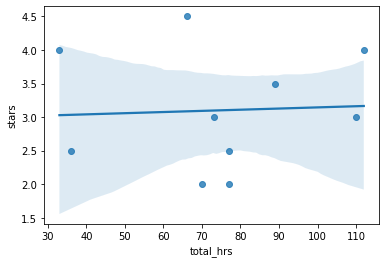

In [412]:
sns.regplot(x=closed_biz_hrs["total_hrs"], y=closed_biz_hrs["stars"])
coeff = np.polyfit(x=closed_biz_hrs["total_hrs"], y=closed_biz_hrs["stars"], deg=1)
print(coeff)
y = coeff[0]*closed_biz_hrs["total_hrs"] + coeff[1]
print("The equation for the line is y = " + str(coeff[0]) + "x + " + str(coeff[1]))

Now, we are creating a new data frame with restaurants on 2nd Ave that are still open, printed the length of the data frame, and displayed the data frame. This is so that we can compare the characteristics of closed restaurants from the cell above and open restaurants. We have also displayed the average number of stars of open restaurants and the average total hours of open businesses.

In [387]:
open_biz_hrs = pd.DataFrame(is_open)
open_total_hrs = []
for biz in is_open.hours:
    open_total_hrs.append(open_hrs(biz))
open_biz_hrs["total_hrs"] = open_total_hrs

print("Avg stars of open restaurants: " + str(np.mean(open_biz_hrs["stars"])))
print("Standard Deviation of stars: " + str(np.std(closed_biz_hrs["stars"])))

print()

print("Avg total hours of open businesses: " + str(np.mean(open_biz_hrs["total_hrs"])))
print("Standard Deviation of total hours: " + str(np.std(closed_biz_hrs["total_hrs"])))

print()

# Spearman correlation
print(stats.spearmanr(open_biz_hrs["total_hrs"], open_biz_hrs["stars"]))

open_biz_hrs

Avg stars of open restaurants: 3.75
Standard Deviation of stars: 0.8306623862918076

Avg total hours of open businesses: 74.14285714285714
Standard Deviation of total hours: 24.875891943807765

SpearmanrResult(correlation=-0.01821109611194002, pvalue=0.9507292318682005)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,total_hrs
89,oaboaRBUgGjbo2kfUIKDLQ,Mike's Ice Cream,129 2nd Ave N,Nashville,TN,37201,36.162649,-86.775973,4.5,593,1,"{'RestaurantsGoodForGroups': 'True', 'GoodForK...","Ice Cream & Frozen Yogurt, Coffee & Tea, Resta...","{'Monday': '8:0-23:0', 'Tuesday': '8:0-23:0', ...",107.50
159,X_E7U2lVNEwbH_gpOBmAHQ,Cerveza Jack's,135 2nd Ave N,Nashville,TN,37201,36.162799,-86.776016,4.0,182,1,"{'GoodForDancing': 'True', 'Smoking': ""u'no'"",...","Nightlife, Restaurants, Bars, Mexican","{'Monday': '0:0-0:0', 'Wednesday': '11:0-22:0'...",85.00
7710,xB2NmS0JG1Vgy7dK2ftcwQ,Taco Bell Cantina,131 2nd Ave N,Nashville,TN,37201,36.162724,-86.776014,2.5,26,1,{'RestaurantsDelivery': 'True'},"Arts & Entertainment, Music Venues, Fast Food,...","{'Monday': '10:0-1:45', 'Tuesday': '10:0-1:45'...",112.25
17517,maOMGu_2dSHKydBgZdTsvQ,Wildhorse Saloon,120 2nd Ave N,Nashville,TN,37201,36.162766,-86.775178,3.5,559,1,"{'OutdoorSeating': 'False', 'BusinessAcceptsCr...","Tours, Local Flavor, Hotels & Travel, Arts & E...","{'Thursday': '16:0-22:0', 'Friday': '12:0-0:0'...",30.00
26266,xlMQBBt9wrtahdqiRDcVSg,The Stillery,113 2nd Ave N,Nashville,TN,37201,36.162249,-86.775712,4.5,2588,1,"{'BikeParking': 'True', 'CoatCheck': 'False', ...","American (New), Restaurants, Pubs, Beer, Wine ...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",79.00
27061,LF8UjsBRaQ4Aqwu3ARxnBg,Rodizio Grill The Brazilian Steakhouse,"166 2nd Ave N, Ste C",Nashville,TN,37201,36.164010,-86.776030,4.0,510,1,"{'BikeParking': 'False', 'RestaurantsAttire': ...","Gluten-Free, Brazilian, Restaurants, Steakhouses","{'Monday': '0:0-0:0', 'Tuesday': '16:0-21:30',...",62.50
71945,UlrEGYuRd5pxW0n4iCR9CQ,Chicken Guy!,139 2nd Ave N,Nashville,TN,37201,36.162919,-86.776068,3.0,24,1,"{'OutdoorSeating': 'True', 'Caters': 'True', '...","Restaurants, Chicken Shop, Fast Food, Sandwiches","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ...",91.00
83703,NXaw6ox4vQkLfQ13sq_oGg,Porch Coffee & Market,401 2nd Ave S,Nashville,TN,37201,36.157509,-86.772627,4.5,14,1,"{'OutdoorSeating': 'True', 'RestaurantsTableSe...","Convenience Stores, Food, Beer, Wine & Spirits...","{'Monday': '8:30-17:0', 'Tuesday': '8:30-17:0'...",61.50
85574,ZDY-jvetOMOE5BMM8e_BcQ,Dick's Last Resort - Nashville,154 2nd Ave N,Nashville,TN,37201,36.163671,-86.775767,3.0,153,1,"{'GoodForKids': 'False', 'RestaurantsGoodForGr...","American (Traditional), Restaurants, Nightlife...","{'Monday': '12:0-20:0', 'Tuesday': '12:0-20:0'...",60.00
87435,Dp6QT6_evsKemZNKgtJ7nA,REPUBLIC quality food & drink,109 2nd Ave N,Nashville,TN,37201,36.162162,-86.775591,4.0,16,1,"{'WheelchairAccessible': 'True', 'RestaurantsR...","Gastropubs, Restaurants","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ...",56.00


[-3.54307244e-03  4.01269351e+00]
The equation for the line is y = -0.0035430724398082x + 4.012693513751494


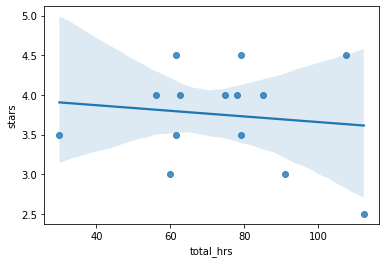

In [371]:
sns.regplot(x=open_biz_hrs["total_hrs"], y=open_biz_hrs["stars"])
coeff = np.polyfit(x=open_biz_hrs["total_hrs"], y=open_biz_hrs["stars"], deg=1)
print(coeff)
y = coeff[0]*open_biz_hrs["total_hrs"] + coeff[1]
print("The equation for the line is y = " + str(coeff[0]) + "x + " + str(coeff[1]))

Findings:
 - On both plots, the slope comparing total hours of a restaurant per week and stars of restaurants on 2nd Ave is very small.  There's a lot of scatter among the points, which suggests that the stars and total hours open per week are not correlated.
 - Upon running a Spearman correlation, we discovered there's basically no correlation between total hours and star ratings.
 
What this means:
 - For both open and closed restaurants, total hours open per week are most likely not related to the average star rating received by the restaurant.  From the Spearman correlation, this suggests that hours don't impact the star rating received by our restaurant.

Below, we are putting the restaurants on 2nd Ave into a dataframe with only the column denoting whether it's open (is_open) and the number of reviews per restaurant (review_count).

In [397]:
is_open_review = two_ave[["is_open", "review_count"]]
print(len(is_open_review))
is_open_review

24


,is_open,review_count
89,1,593
159,1,182
1494,0,89
4689,0,75
7710,1,26
17517,1,559
26266,1,2588
27061,1,510
40375,0,115
55579,0,12


Coefficient: [[0.00691969]]
Intercept (beta)): [-0.54389141]
Odds Ratio: [0.58048495]


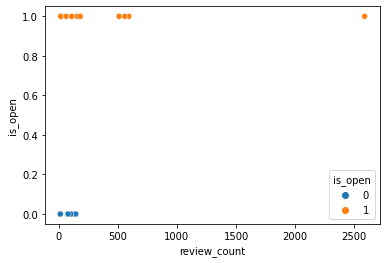

In [421]:
x = np.array(is_open_review["review_count"]).reshape(-1, 1)
y = np.array(is_open_review["is_open"])
sns.scatterplot(data=is_open_review, x="review_count", y="is_open", hue="is_open")
reg = LogisticRegression()
reg.fit(x, y)
print("Coefficient: " + str(reg.coef_))
print("Intercept (beta)): " + str(reg.intercept_))
print("Odds Ratio: " + str(math.e**reg.intercept_))

Interpretation (https://quantifyinghealth.com/interpret-logistic-regression-coefficients/):
 - A open restaurant has (1 - 0.58)% reduction in reviews.

In [390]:
with open('./project_files/yelp_academic_dataset_tip.json', encoding='utf-8') as inputfile:
    df = pd.read_json(inputfile, lines=True)
df.to_csv('./project_files/yelp_academic_dataset_tip.csv', encoding='utf-8', index = False)

In [392]:
tip_data = pd.read_csv('./project_files/yelp_academic_dataset_tip.csv')
tip_data

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0
...,...,...,...,...,...
908910,eYodOTF8pkqKPzHkcxZs-Q,3lHTewuKFt5IImbXJoFeDQ,Disappointed in one of your managers.,2021-09-11 19:18:57,0
908911,1uxtQAuJ2T5Xwa_wp7kUnA,OaGf0Dp56ARhQwIDT90w_g,Great food and service.,2021-10-30 11:54:36,0
908912,v48Spe6WEpqehsF2xQADpg,hYnMeAO77RGyTtIzUSKYzQ,Love their Cubans!!,2021-11-05 13:18:56,0
908913,ckqKGM2hl7I9Chp5IpAhkw,s2eyoTuJrcP7I_XyjdhUHQ,Great pizza great price,2021-11-20 16:11:44,0
